# WeatherPy
----

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os
import openweathermapy.core as owm
from urllib.error import HTTPError
import seaborn as sns

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("output_data","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
# If the city is unique, then add it to a our cities list
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
            cities.append(city)
    

# Print the city count to confirm sufficient count
len(cities)

591

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
# Create a settings dictionary with your API key and preferred units
settings = {"units":"imperial","appid":api_key}
# Convert list to DataFrame for opqenweathermapy
cities_df = pd.DataFrame.from_dict(cities)
cities_df.rename(columns={0:"City"},inplace=True)
cities_df.head()

,City
0,nikolskoye
1,podbelsk
2,rikitea
3,shenjiamen
4,altay


## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
print("Beginning Data Retrieval")
print("-"*60)
ctr = -1
for each in cities:
    ctr += 1
    print(f"Retrieving current weather data for {each} | {ctr+1} of {len(cities)}...")
    try:
        response = owm.get_current(each, **settings)
    except HTTPError:
        print("No data for this city.")
    cities_df.loc[ctr,"Temperature (F)"] = response["main"]["temp"]
    cities_df.loc[ctr,"Humidity %"] = response["main"]["humidity"]
    cities_df.loc[ctr,"Cloudiness %"] = response["clouds"]["all"]
    cities_df.loc[ctr,"Wind Speed mph"] = response["wind"]["speed"]
    cities_df.loc[ctr,"Latitude"] = response["coord"]["lat"]
    cities_df.loc[ctr,"Longitude"] = response["coord"]["lon"]
    cities_df.loc[ctr,"Date"] = time.ctime(response["dt"])
print("-"*60)
print("Completed Data Retrieval")
print("-"*60)

Beginning Data Retrieval
------------------------------------------------------------
Retrieving current weather data for nikolskoye | 1 of 591...
Retrieving current weather data for podbelsk | 2 of 591...
No data for this city.
Retrieving current weather data for rikitea | 3 of 591...
Retrieving current weather data for shenjiamen | 4 of 591...
Retrieving current weather data for altay | 5 of 591...
Retrieving current weather data for longyearbyen | 6 of 591...
Retrieving current weather data for saskylakh | 7 of 591...
Retrieving current weather data for hobart | 8 of 591...
Retrieving current weather data for severo-kurilsk | 9 of 591...
Retrieving current weather data for iqaluit | 10 of 591...
Retrieving current weather data for bredasdorp | 11 of 591...
Retrieving current weather data for punta arenas | 12 of 591...
Retrieving current weather data for gizo | 13 of 591...
Retrieving current weather data for new norfolk | 14 of 591...
Retrieving current weather data for hermanus | 

In [10]:
cities_df.to_csv(output_data_file,index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Plot Latitude vs. Temperature

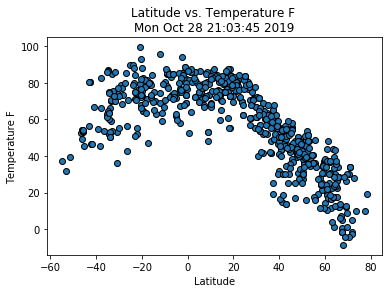

In [15]:
plt.scatter(cities_df["Latitude"],cities_df["Temperature F"],edgecolors="k")
plt.title(f"Latitude vs. Temperature F \n{cities_df.Date[0]}")
plt.ylabel("Temperature F")
plt.xlabel("Latitude")
plt.savefig(os.path.join('Images','Latitude_Temperature_chart.png'))
plt.show()

### Plot Latitude vs. Humidity %

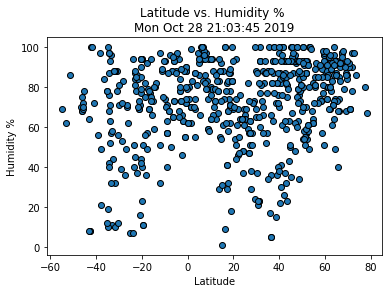

In [16]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity %"],edgecolors="k")
plt.title(f"Latitude vs. Humidity % \n{cities_df.Date[0]}")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig(os.path.join('Images','Latitude_Humidity_chart.png'))
plt.show()

## Plot Latitude vs. Cloudiness %

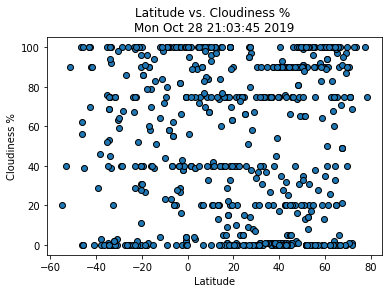

In [17]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness %"],edgecolors="k")
plt.title(f"Latitude vs. Cloudiness % \n{cities_df.Date[0]}")
plt.ylabel("Cloudiness %")
plt.xlabel("Latitude")
plt.savefig(os.path.join('Images','Latitude_Cloudiness_chart.png'))
plt.show()

## Plot Latitude vs. Wind Speed mph

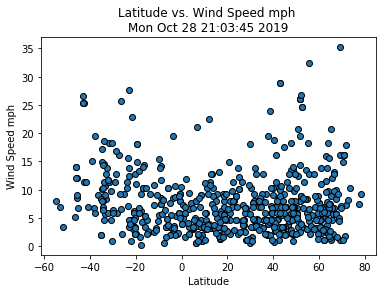

In [18]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed mph"],edgecolors="k")
plt.title(f"Latitude vs. Wind Speed mph \n{cities_df.Date[0]}")
plt.ylabel("Wind Speed mph")
plt.xlabel("Latitude")
plt.savefig(os.path.join('Images','Latitude_Wind_Speed_chart.png'))
plt.show()

## Analysis of Obversed Trends
1. 

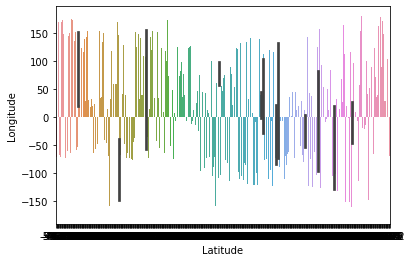

In [5]:
sns.barplot(x='Latitude',y='Longitude',data=cities_df)

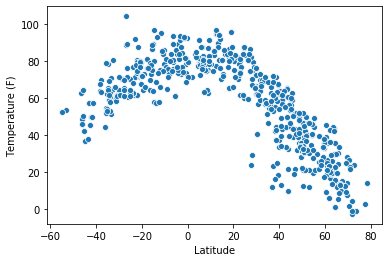

In [8]:
sns.scatterplot(x='Latitude',y='Temperature (F)',data=cities_df)